# Import Libraries

In [1]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load dataset

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
url

'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'

In [3]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
names

['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

In [4]:
dataset = pandas.read_csv(url, names=names)
# Preview top 5 rows
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# shape
print("Shape: ",dataset.shape,"\n")

Shape:  (150, 5) 



In [6]:
# head
print("First records of data:\n ",dataset.head(),"\n")

First records of data:
     sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa 



In [7]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# NEW SECTION - Explore single variable

Repeating Class Distribution example above for one of the other features: e.g. Petal.Length
1) Figure out type of output
2) Print the distribution for that feature (should be comparable with the Histogram's section chart further down)
3) Plot feature's histogram and box plot

In [8]:
# print type of output from groupby
type(dataset.groupby('class').size())

pandas.core.series.Series

In [9]:
# petal length distribution
print(dataset.groupby('petal-length').size())

petal-length
1.0     1
1.1     1
1.2     2
1.3     7
1.4    12
1.5    14
1.6     7
1.7     4
1.9     2
3.0     1
3.3     2
3.5     2
3.6     1
3.7     1
3.8     1
3.9     3
4.0     5
4.1     3
4.2     4
4.3     2
4.4     4
4.5     8
4.6     3
4.7     5
4.8     4
4.9     5
5.0     4
5.1     8
5.2     2
5.3     2
5.4     2
5.5     3
5.6     6
5.7     3
5.8     3
5.9     2
6.0     2
6.1     3
6.3     1
6.4     1
6.6     1
6.7     2
6.9     1
dtype: int64


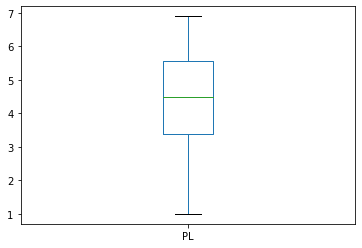

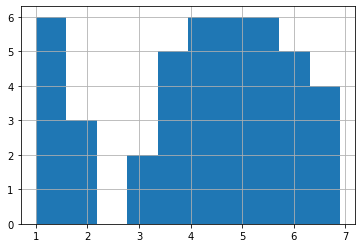

In [10]:
# petal lenght distribution
# store in dataframe 
# plot wisker-box and histogramme
import pandas as pd
plh = dataset.groupby('petal-length').size()
plh_df = pd.DataFrame({'PL':plh.index, 'PL Count':plh.values})

plh_df["PL"].plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()
plh_df["PL"].hist()
plt.show()

# NEW SECTION - EDA with new features - Length over Width

In [11]:
# Try length_over_width (or "low") as new feature
import pandas as low
p_low = dataset['petal-length']/dataset['petal-width']
s_low = dataset['sepal-length']/dataset['sepal-width']
low_df = low.DataFrame({'Petal Lenght over Width':p_low, 'Sepal Lenght over Width':s_low})

print("Number or rows and columns of new features:",low_df.shape)
low_df.head()


Number or rows and columns of new features: (150, 2)


,Petal Lenght over Width,Sepal Lenght over Width
0,7.0,1.457143
1,7.0,1.633333
2,6.5,1.468750
3,7.5,1.483871
4,7.0,1.388889


Concatenate original Dataframe with new one

In [12]:
eda_dataset = pd.concat([dataset, low_df], axis=1, sort=False)
eda_dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class,Petal Lenght over Width,Sepal Lenght over Width
0,5.1,3.5,1.4,0.2,Iris-setosa,7.0,1.457143
1,4.9,3.0,1.4,0.2,Iris-setosa,7.0,1.633333
2,4.7,3.2,1.3,0.2,Iris-setosa,6.5,1.468750
3,4.6,3.1,1.5,0.2,Iris-setosa,7.5,1.483871
4,5.0,3.6,1.4,0.2,Iris-setosa,7.0,1.388889


### Descriptions for new Dataframe

In [13]:
eda_dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width,Petal Lenght over Width,Sepal Lenght over Width
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,4.367166,1.955144
std,0.828066,0.433594,1.764420,0.763161,2.651508,0.398697
min,4.300000,2.000000,1.000000,0.100000,2.125000,1.268293
25%,5.100000,2.800000,1.600000,0.300000,2.802381,1.551915
50%,5.800000,3.000000,4.350000,1.300000,3.300000,2.032292
75%,6.400000,3.300000,5.100000,1.800000,4.666667,2.224910
max,7.900000,4.400000,6.900000,2.500000,15.000000,2.961538


### Box and Whisker Plots for new Dataframe

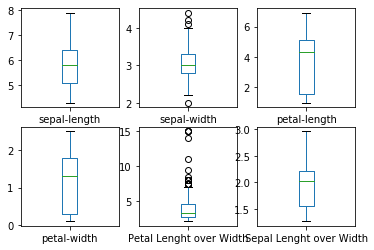

In [14]:
eda_dataset.plot(kind='box', subplots=True,layout=(2,3), sharex=False, sharey=False)
plt.show()

### Histograme for new Dataframe

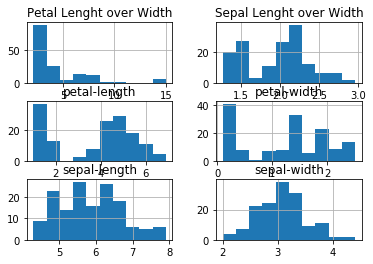

In [15]:
eda_dataset.hist()
plt.show()

### Scatter Plot matrix for new Dataframe

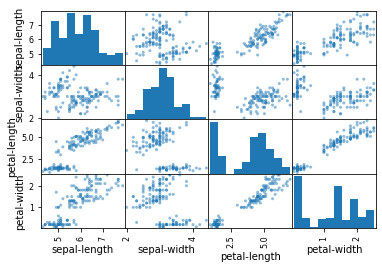

In [16]:
scatter_matrix(dataset)
plt.show()

# Descriptions

In [17]:
print("Statistical description of data:\n",dataset.describe())

Statistical description of data:
        sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


# Box and Whisker plots

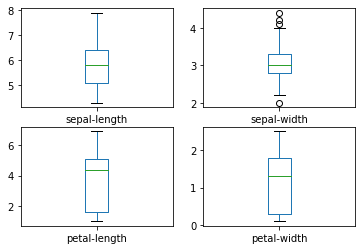

In [18]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# Histograms

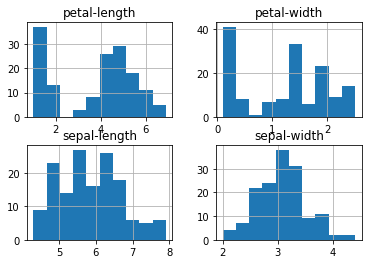

In [19]:
dataset.hist()
plt.show()

# Scatter plot matrix

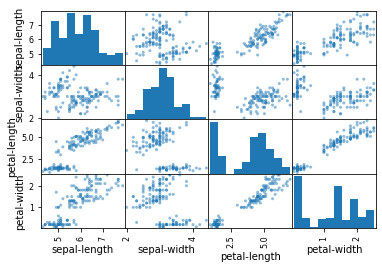

In [20]:
scatter_matrix(dataset)
plt.show()

# Split-out validation dataset

In [21]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)


# Create Model Shells (Instantiate them - IMPROVED version tuning parameters to avoid warnings)

In [22]:
models = []
# I was getting errors or future warnings running LR, RF and SVM with no input parameters, so had to tweak the inputs to address the warnings
# On the plus side, it improved performance :) 
models.append(('LR', LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=1000,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                             solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_sam

# Spot test each model with Cross-Validation

In [23]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
RF: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


# Graphical comparison of algorithms

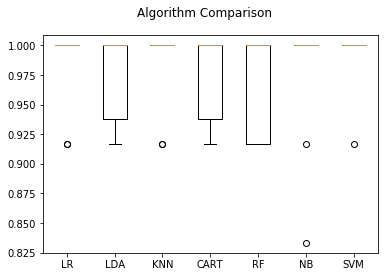

In [24]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Make predictions on validation dataset
K-Nearest Neighbors:

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



SVM - Support Vector Machine:

In [26]:
svm = SVC(gamma='auto')
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



## NEW SECTION - Improve KNN & SVM

### Original KNN with single parameter Tuning

In [27]:
### Original model with single parameter tuning
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=1,
           weights='uniform')

# knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



### Improved KNN with Hyper Parameter tuning using GridSearchCV

In [28]:
# Test range of parameters using GridSearch Hyper Parameter tuning
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
import numpy as np
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)


#fit model to data
knn_gscv.fit(X, Y)

#check top performing n_neighbors value
print("Optimal value of n_neighbors parameter:",knn_gscv.best_params_)

#check mean score for the top performing value of n_neighbors
print("Best Score for top performing value of n_neighbors", knn_gscv.best_score_)



Optimal value of n_neighbors parameter: {'n_neighbors': 6}
Best Score for top performing value of n_neighbors 0.98


### Original SVC with single parameter tuning

In [29]:

svm = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
#svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30

